### 6.6 Sourcing & Analyzing Time-Series Data

 #### This script contains the following:
    
1. Importing libraries and data
2. Data overview
3. Plotting the data
4. Time-series analysis: decomposition
5. Testing for stationarity
6. Stationarizing the Data
7. 1st round Differencing
8. 2nd round differencing
9. Importing new Dataset

 9.1 Create subset and Reset Index 
 
 9.2 Plot the data
 
 9.3 Decomposition
 
 9.4 Dicky-Fuller Stationarity Test
 
 9.5 1st round Differencing

### 1. Importing libraries and data

In [99]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [100]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller # used for dicky-fuller test
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # tool is used for autocorrelation
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
from datetime import datetime # used to create datetime datatype from index

from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7
rcParams['lines.linewidth'] = 1

In [101]:
# Define path
path = '/Users/bente/careerfoundry /exercise_6/02 Data/prepared data'

In [102]:
# Concatenate the directory path and file name
file_path = os.path.join(path,'LAST_CLEANED.csv')

In [103]:
# Read the CSV file
df = pd.read_csv(file_path) 

### 2. Data overview

In [104]:
df.head()

,name,year,continent,least_developed,life_expect,population,CO2_emiss,health_spend(% of GDP),electr_consum(kWh/capita),forest_area,gdp_per_capita,internet_users,military_spend,open_defecation,drinking_water_user,adult_obesity,beer_per_capita,life_exp_category
0,Albania,2000,Europe,0,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431,Middle Life Expectancy
1,Albania,2001,Europe,0,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995,Middle Life Expectancy
2,Albania,2002,Europe,0,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697,Middle Life Expectancy
3,Albania,2003,Europe,0,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830,Middle Life Expectancy
4,Albania,2004,Europe,0,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617,High Life Expectancy


In [105]:
df.shape

(2373, 18)

In [106]:
# list columns in dataframe
df.columns.to_list()

['name',
 'year',
 'continent',
 'least_developed',
 'life_expect',
 'population',
 'CO2_emiss',
 'health_spend(% of GDP)',
 'electr_consum(kWh/capita)',
 'forest_area',
 'gdp_per_capita',
 'internet_users',
 'military_spend',
 'open_defecation',
 'drinking_water_user',
 'adult_obesity',
 'beer_per_capita',
 'life_exp_category']

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       2373 non-null   object 
 1   year                       2373 non-null   int64  
 2   continent                  2373 non-null   object 
 3   least_developed            2373 non-null   int64  
 4   life_expect                2373 non-null   float64
 5   population                 2373 non-null   int64  
 6   CO2_emiss                  2373 non-null   float64
 7   health_spend(% of GDP)     2373 non-null   float64
 8   electr_consum(kWh/capita)  2373 non-null   float64
 9   forest_area                2373 non-null   float64
 10  gdp_per_capita             2373 non-null   float64
 11  internet_users             2373 non-null   float64
 12  military_spend             2373 non-null   float64
 13  open_defecation            2373 non-null   float

### 3. Subsetting, wrangling, and cleaning time-series data

### 3. Creating subsets

In [108]:
#creating a subset for the country albania 
df_albania  = df[df["name"]=="Albania"]
df_albania.columns

Index(['name', 'year', 'continent', 'least_developed', 'life_expect',
       'population', 'CO2_emiss', 'health_spend(% of GDP)',
       'electr_consum(kWh/capita)', 'forest_area', 'gdp_per_capita',
       'internet_users', 'military_spend', 'open_defecation',
       'drinking_water_user', 'adult_obesity', 'beer_per_capita',
       'life_exp_category'],
      dtype='object')

In [109]:
# List of columns to remove ( columns with object type)
columns_to_remove = ["name", "continent", "life_exp_category"]
  
# Drop the columns from the DataFrame
df_albania = df_albania.drop(columns=columns_to_remove)

In [110]:
# creating new subset with mean life expectancy per year
#'year' column is used as the index. When using the groupby function in pandas, the column one is grouping by 
#becomes the index of the resulting DataFrame by default
df_mean_life= pd.DataFrame(df.groupby('year')['life_expect'].mean())
df_mean_life  

,life_expect
year,
2000,68.780106
2001,69.053435
2002,69.270839
2003,69.517946
2004,69.885189
2005,70.148940
2006,70.489055
2007,70.816282
2008,71.207246


In [111]:
# creating new subset with gdp_per_capita per year 
df_mean_gdp= pd.DataFrame(df.groupby('year')['gdp_per_capita'].mean())
df_mean_gdp   

,gdp_per_capita
year,
2000,13400.675766
2001,13864.738110
2002,14362.708185
2003,14923.296316
2004,15934.200440
2005,16759.179095
2006,18218.744311
2007,19374.232099
2008,20230.382109


In [112]:
# creating new subset with drinking_water_user per year 
df_mean_drinking_water_user= pd.DataFrame(df.groupby('year')['drinking_water_user'].mean())
df_mean_drinking_water_user  

,drinking_water_user
year,
2000,84.815913
2001,85.164206
2002,85.537029
2003,85.906442
2004,86.266612
2005,86.638762
2006,87.014148
2007,87.392660
2008,87.770948


In [113]:
# creating new subset with health_spend(% of GDP) per year 
df_mean_health_spend= pd.DataFrame(df.groupby('year')['health_spend(% of GDP)'].mean())
df_mean_health_spend

,health_spend(% of GDP)
year,
2000,5.528664
2001,5.700272
2002,5.889036
2003,6.005735
2004,6.006190
2005,5.992308
2006,5.963871
2007,5.957447
2008,6.090146


### 3. Plotting the data

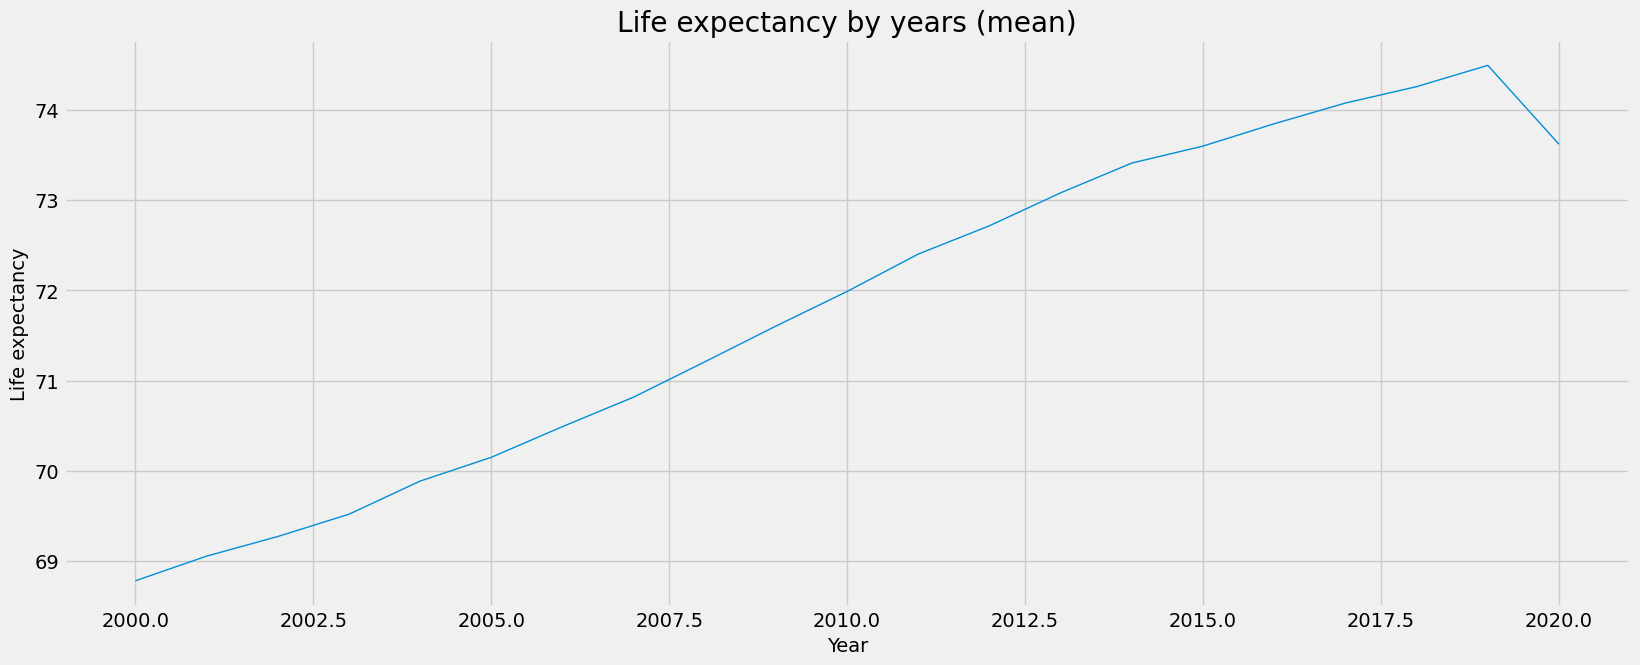

In [115]:
# Plot the data of df_mean_life using matplotlib.

plt.figure(figsize=(18,7), dpi=100) 
plt.title('Life expectancy by years (mean)')
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.plot(df_mean_life)

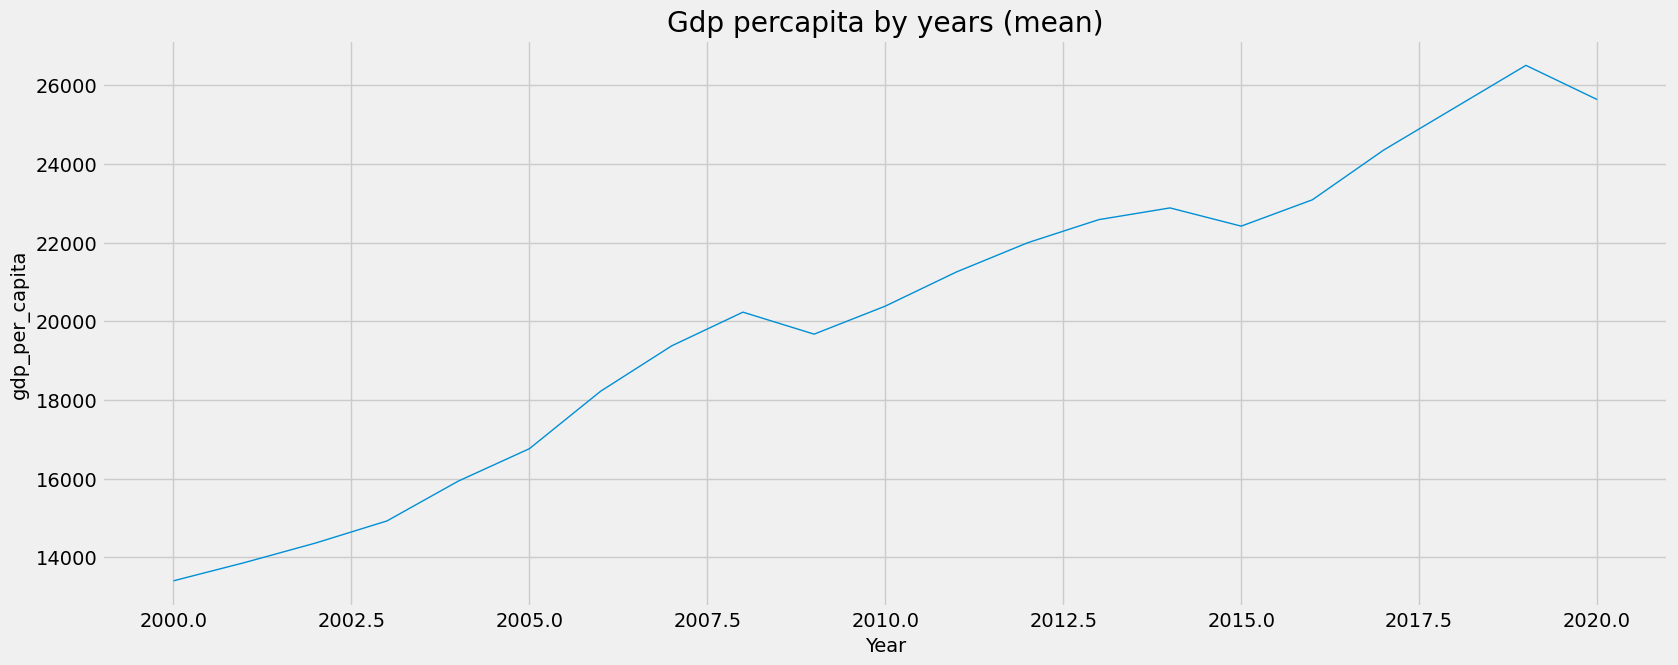

In [116]:
# Plot the data of df_mean_gdp using matplotlib.

plt.figure(figsize=(18,7), dpi=100) 
plt.title('Gdp percapita by years (mean)')
plt.xlabel('Year')
plt.ylabel('gdp_per_capita')
plt.plot(df_mean_gdp)

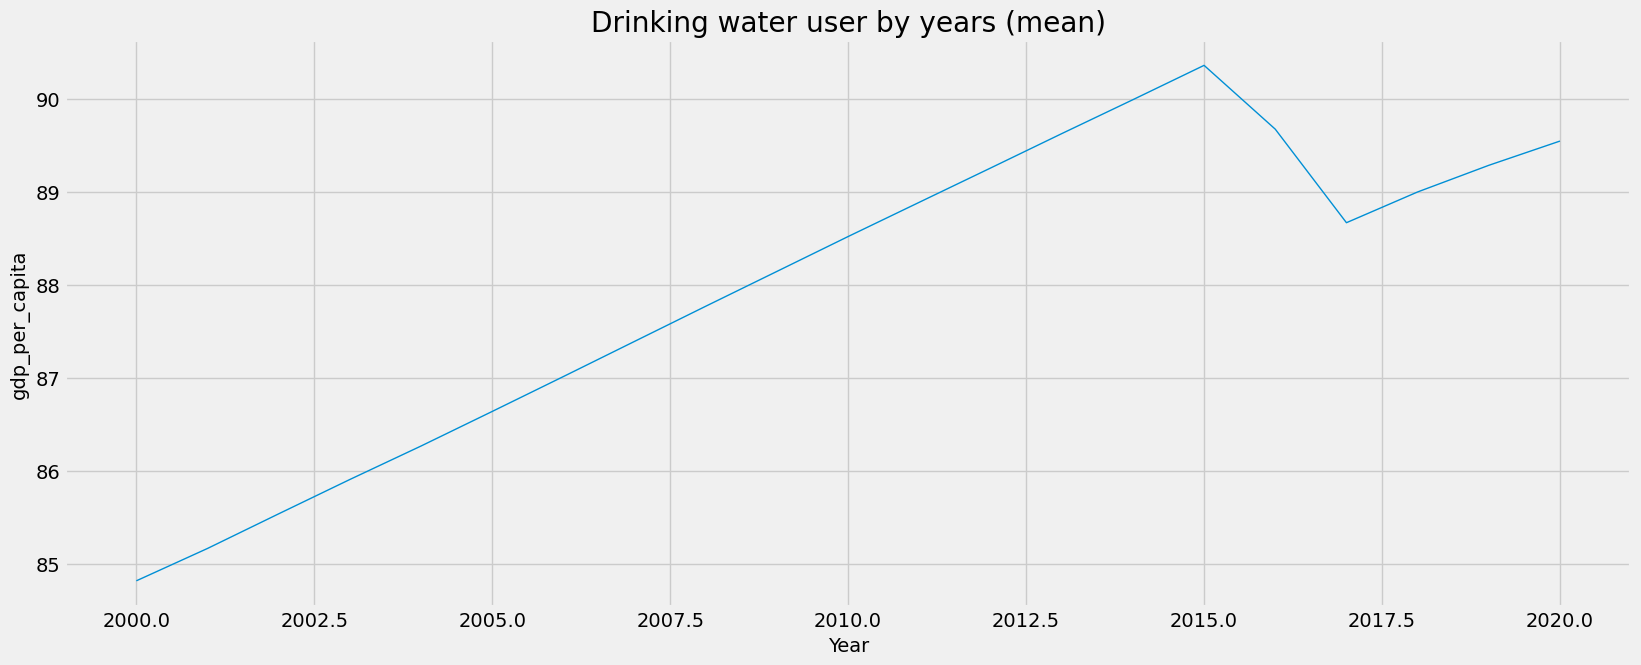

In [117]:
# Plot the data of df_mean_drinking_water_user using matplotlib.

plt.figure(figsize=(18,7), dpi=100) 
plt.title('Drinking water user by years (mean)')
plt.xlabel('Year')
plt.ylabel('gdp_per_capita')
plt.plot(df_mean_drinking_water_user ) 

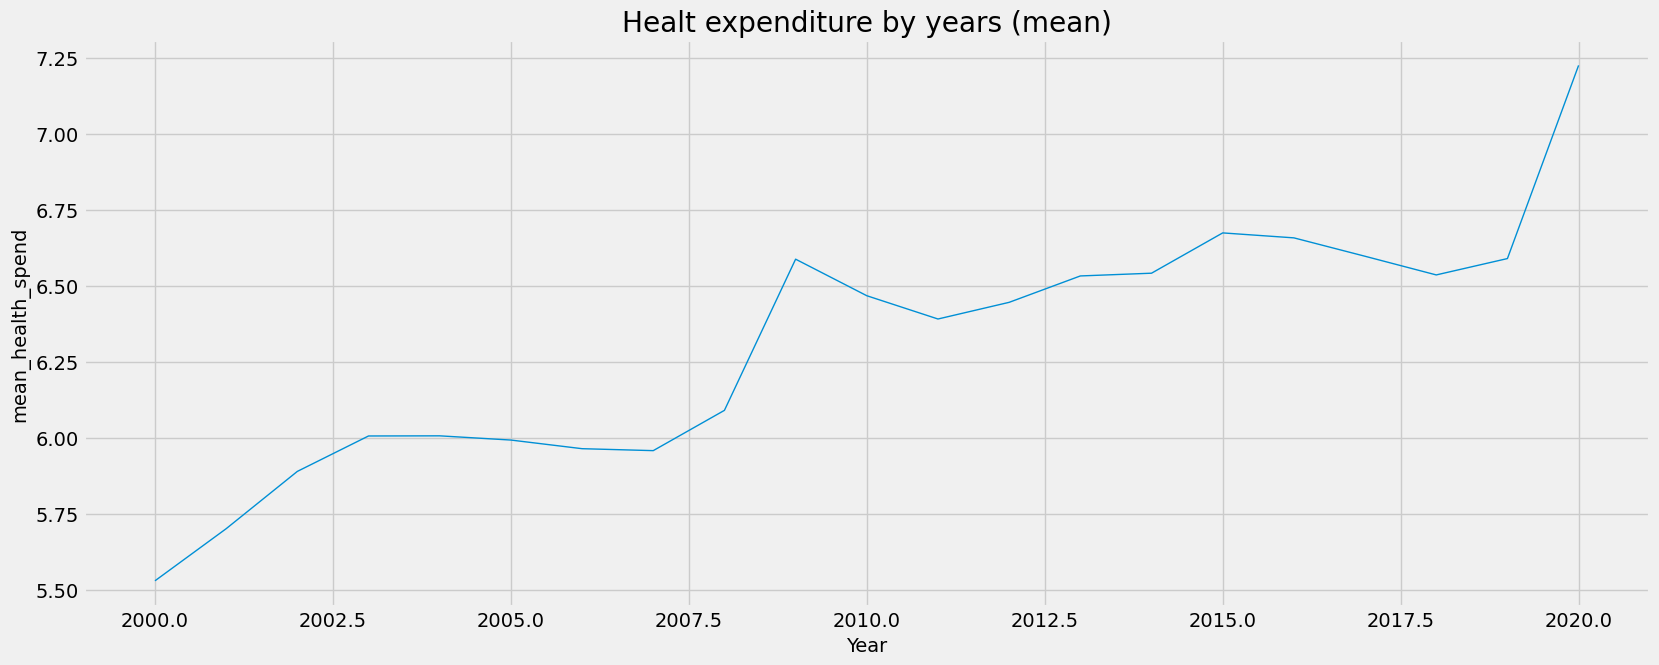

In [118]:
# Plot the data of df_mean_health_spend using matplotlib.

plt.figure(figsize=(18,7), dpi=100) 
plt.title('Healt expenditure by years (mean)')
plt.xlabel('Year')
plt.ylabel('mean_health_spend')
plt.plot(df_mean_health_spend) 

In [ ]:
df_mean_health_spend

### 4.Time-series analysis: decomposition¶

In [119]:
# Reset index to make 'year' a regular column
df_mean_life.reset_index(inplace=True)

# Convert 'year' column to datetime dtype
df_mean_life['year'] = pd.to_datetime(df_mean_life['year'], format='%Y')


In [120]:
df_mean_life

,year,life_expect
0,2000-01-01,68.780106
1,2001-01-01,69.053435
2,2002-01-01,69.270839
3,2003-01-01,69.517946
4,2004-01-01,69.885189
5,2005-01-01,70.148940
6,2006-01-01,70.489055
7,2007-01-01,70.816282
8,2008-01-01,71.207246
9,2009-01-01,71.603910


In [121]:
# set year column as index
df_mean_life = df_mean_life.set_index('year') 

In [122]:
df_mean_life

,life_expect
year,
2000-01-01,68.780106
2001-01-01,69.053435
2002-01-01,69.270839
2003-01-01,69.517946
2004-01-01,69.885189
2005-01-01,70.148940
2006-01-01,70.489055
2007-01-01,70.816282
2008-01-01,71.207246


In [124]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_mean_life, model='additive')

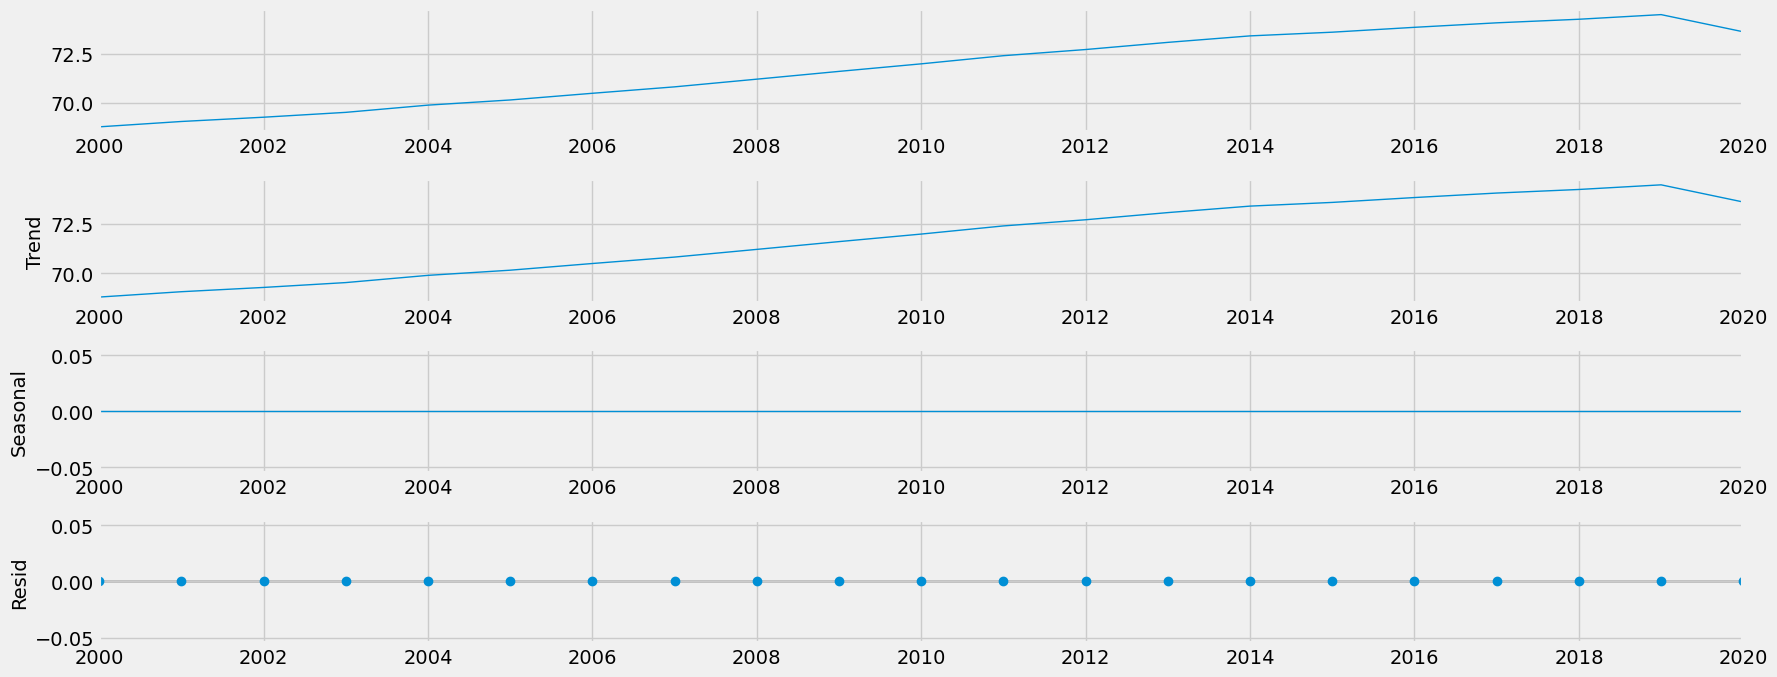

In [125]:
# plotting decomposition chart
decomposition.plot()
plt.show()

This decomposition shows that the data is not seasonal but that theres a upward trend with a small downward trend at 2019. 

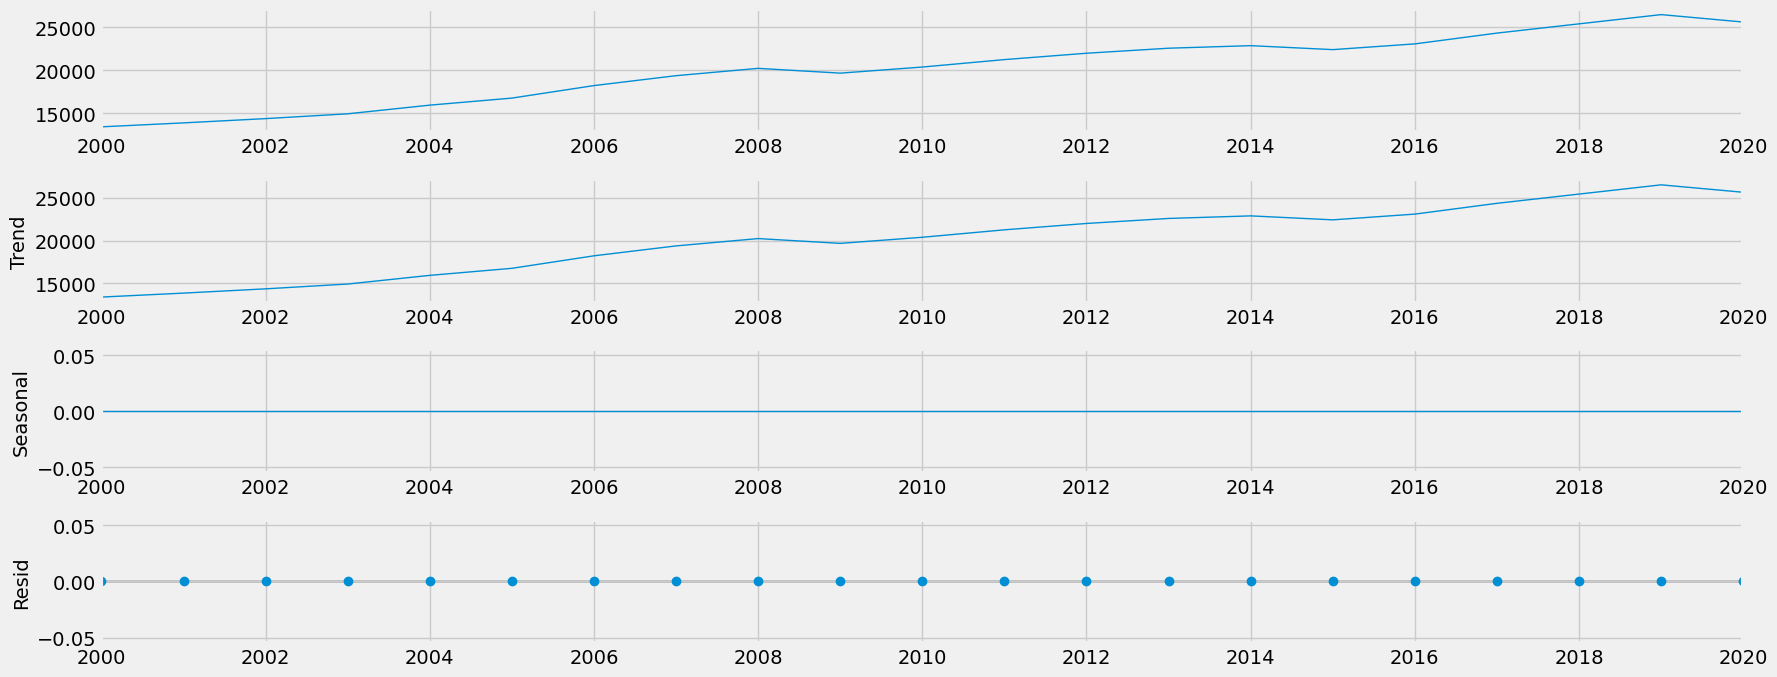

In [126]:
# Doing the same for df_mean_gdp

# Reset index to make 'year' a regular column
df_mean_gdp.reset_index(inplace=True)

# Convert 'year' column to datetime dtype
df_mean_gdp['year'] = pd.to_datetime(df_mean_gdp['year'], format='%Y')

# set year column as index
df_mean_gdp = df_mean_gdp.set_index('year') 

# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_mean_gdp, model='additive')

# plotting decomposition chart
decomposition.plot()
plt.show()


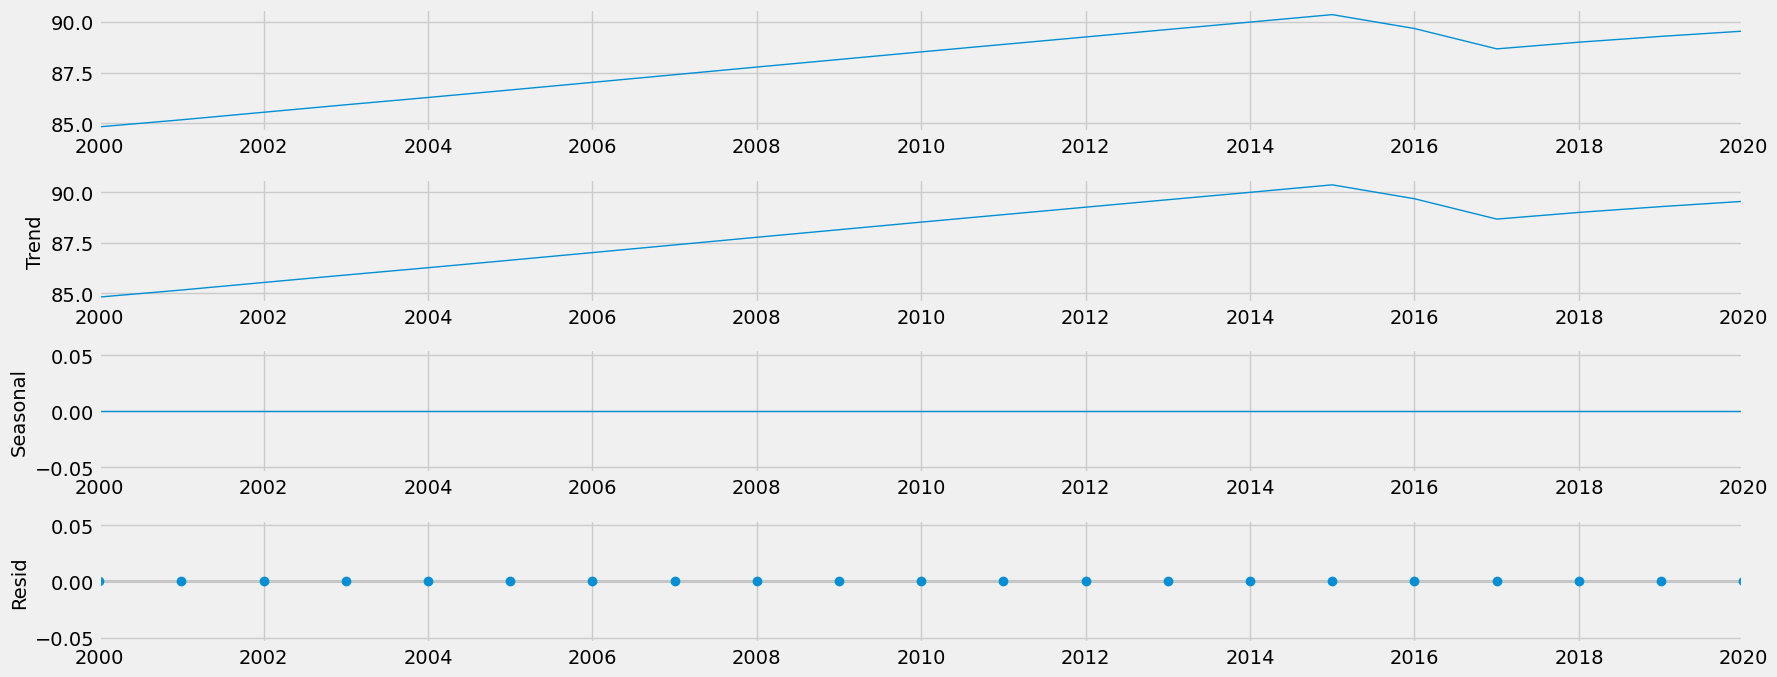

In [127]:
# Doing the same for df_mean_drinking_water_user

# Reset index to make 'year' a regular column
df_mean_drinking_water_user.reset_index(inplace=True)

# Convert 'year' column to datetime dtype
df_mean_drinking_water_user['year'] = pd.to_datetime(df_mean_drinking_water_user['year'], format='%Y')

# set year column as index
df_mean_drinking_water_user = df_mean_drinking_water_user.set_index('year') 

# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_mean_drinking_water_user, model='additive')

# plotting decomposition chart
decomposition.plot()
plt.show()


There is no seasonality in the data, just a general upward trend with a small downward trend in the year 2015, 
followed by upward trend again. 

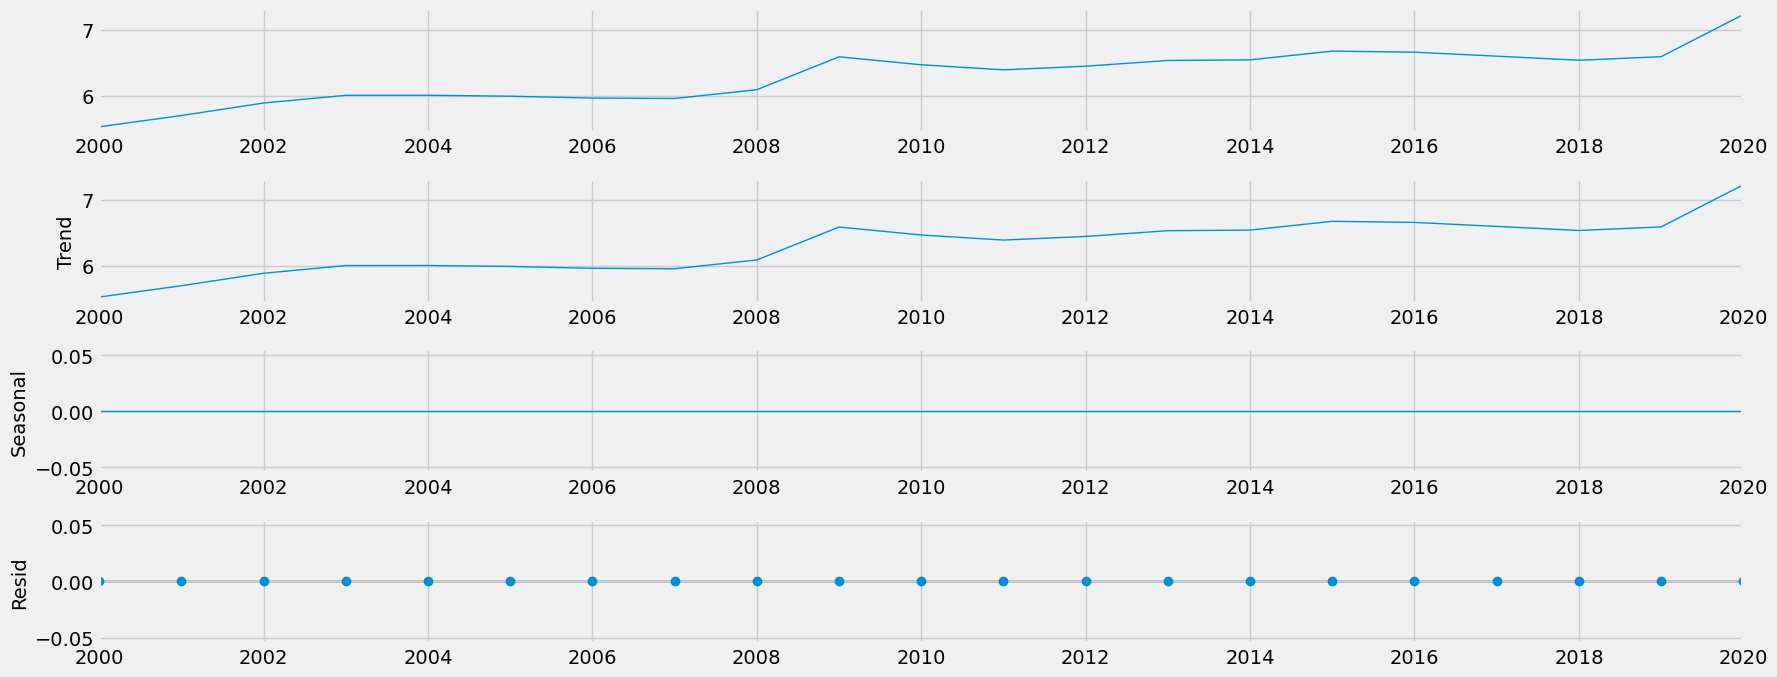

In [128]:
# Doing the same for df_mean_health_spend

# Reset index to make 'year' a regular column
df_mean_health_spend.reset_index(inplace=True)

# Convert 'year' column to datetime dtype
df_mean_health_spend['year'] = pd.to_datetime(df_mean_health_spend['year'], format='%Y')

# set year column as index
df_mean_health_spend = df_mean_health_spend.set_index('year') 

# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_mean_health_spend, model='additive')

# plotting decomposition chart
decomposition.plot()
plt.show()

### 5. Testing for stationarity

In the Dickey-Fuller test, the null hypothesis is that the time series data is non-stationary. 

In [130]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


In [131]:
# health_spend(% of GDP)
# Apply the test using the function on the time series
dickey_fuller(df_mean_health_spend['health_spend(% of GDP)']) 

Dickey-Fuller Stationarity test:
Test Statistic                 -0.688399
p-value                         0.849732
Number of Lags Used             0.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


Test statistic smaller than critical values = can reject null hypothesis.

Mean health expenditure data is not stationary.

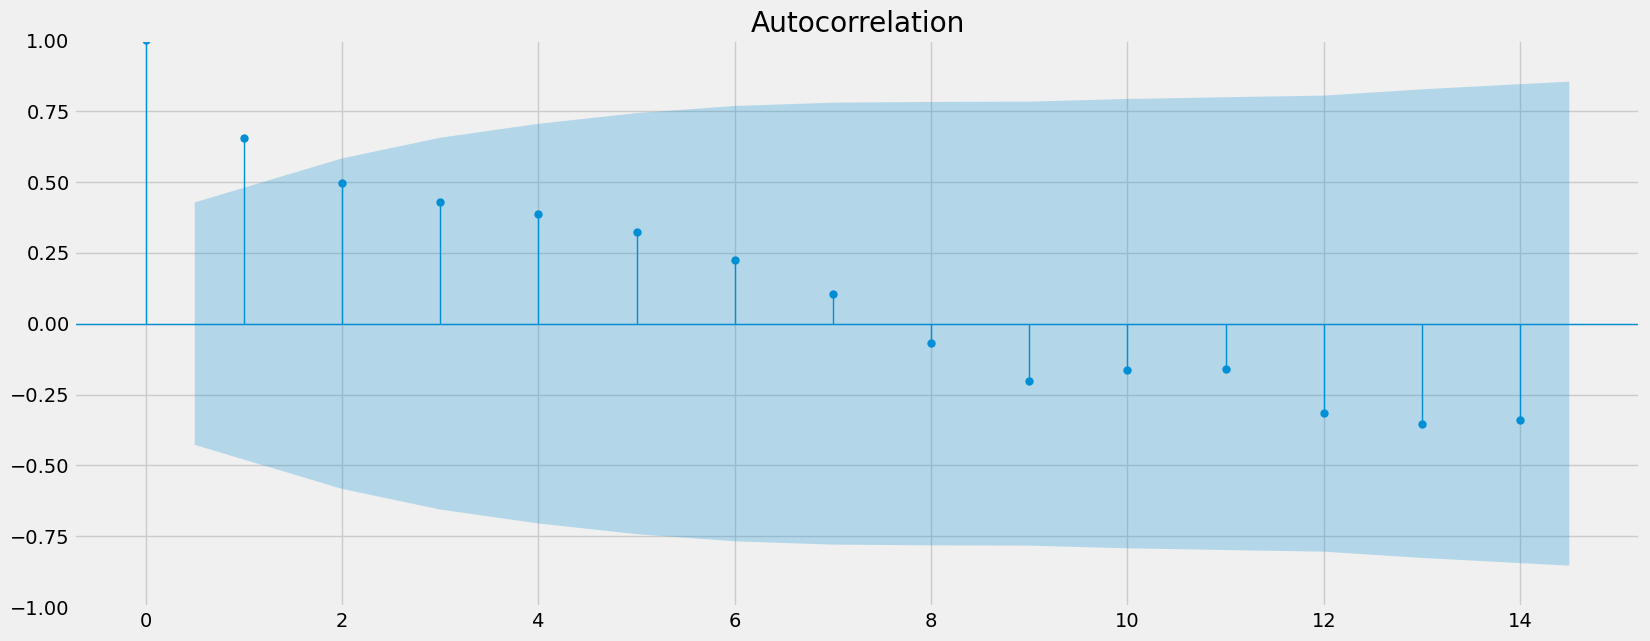

In [137]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # import the autocorrelation and partial correlation plots

plot_acf(df_mean_health_spend)
plt.show()

In [133]:
# df_mean_drinking_water_user
# Apply the test using the function on the time series
dickey_fuller(df_mean_drinking_water_user['drinking_water_user'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.250571
p-value                         0.017238
Number of Lags Used             7.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64




Test statistic is smaller than the value of the critical value for the 5% and 10% significance level (-3.127149
and -2.701730) 

Test statistic smaller than critical values = can reject null hypothesis.

mean drinking water users data is stationary for the significance levels of 5% and 10%. 

Test statistic is bigger than critical value for 1% significance, we CAN'T reject null hypothesis.
Mean drinking water users data is  non stationary for the 1% significance level. 


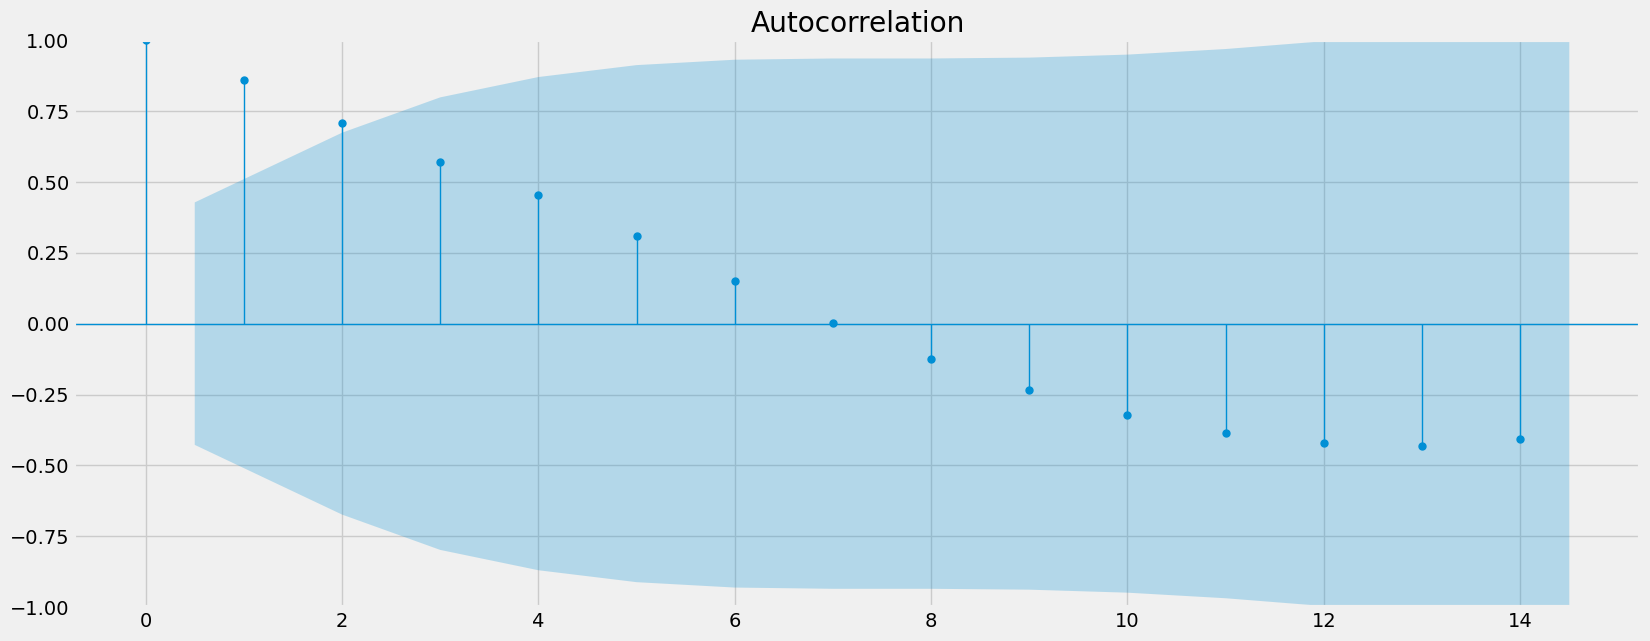

In [139]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # import the autocorrelation and partial correlation plots

plot_acf(df_mean_drinking_water_user)
plt.show()

In [134]:
# df_mean_gdp
# Apply the test using the function on the time series
dickey_fuller(df_mean_gdp['gdp_per_capita'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.668084
p-value                         0.447627
Number of Lags Used             6.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [ ]:
Test statistic smaller than critical values = can reject null hypothesis.
Mean gdp data is not stationary. 

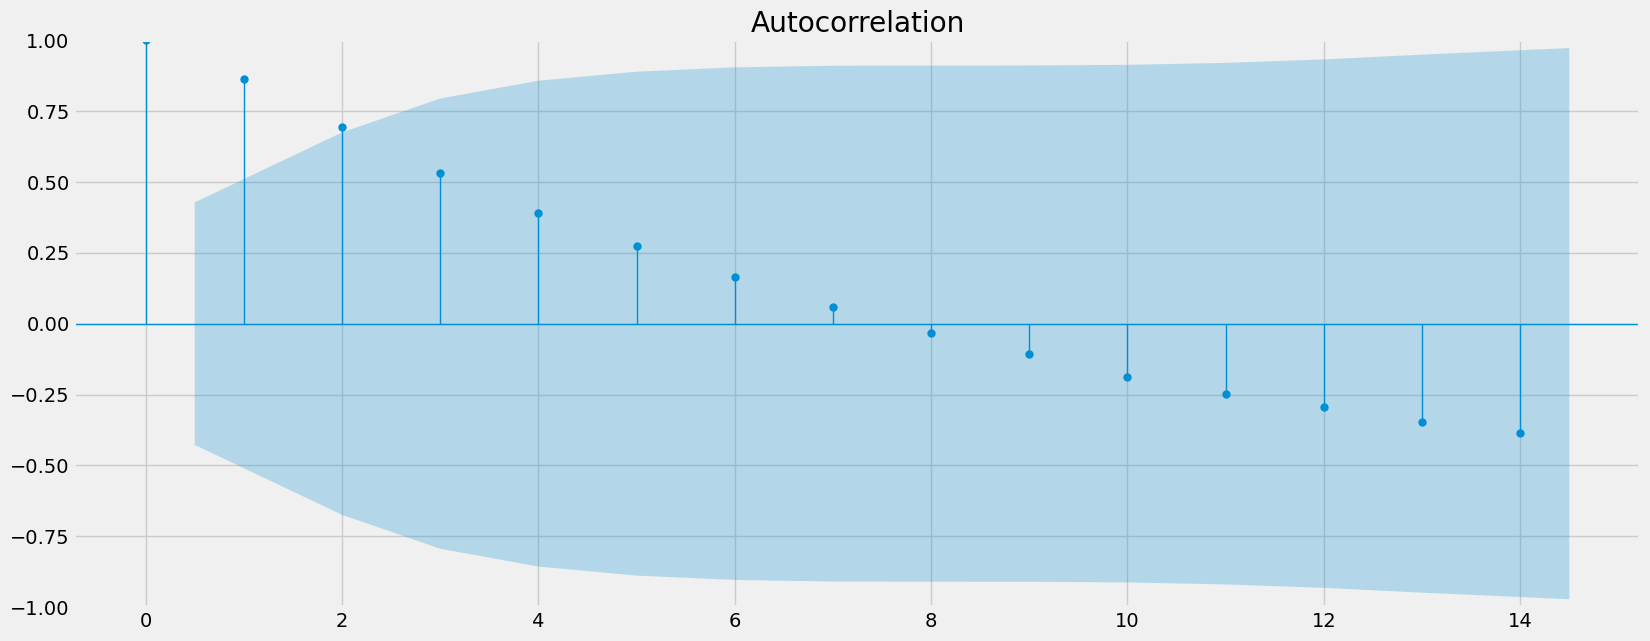

In [140]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # import the autocorrelation and partial correlation plots

plot_acf(df_mean_gdp)
plt.show()

In [136]:
# df_mean_life
# Apply the test using the function on the time series
dickey_fuller(df_mean_life['life_expect'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.010716
p-value                         0.033906
Number of Lags Used             6.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [ ]:
Test statistic smaller than critical values = can reject null hypothesis.

-> Test statistic bigger than critical value for significance levels 1%(-4.012034)and 5% (-3.104184). We
can't reject null hypothesis for this significance values. 

Mean life expectancy data for 1% and 5% is non stationary.

Test statistic(-3.010716) smaller then Critical Value 10% (-2.690987), means we can reject null hypothesis. 
Data is stationary for this significance level. 

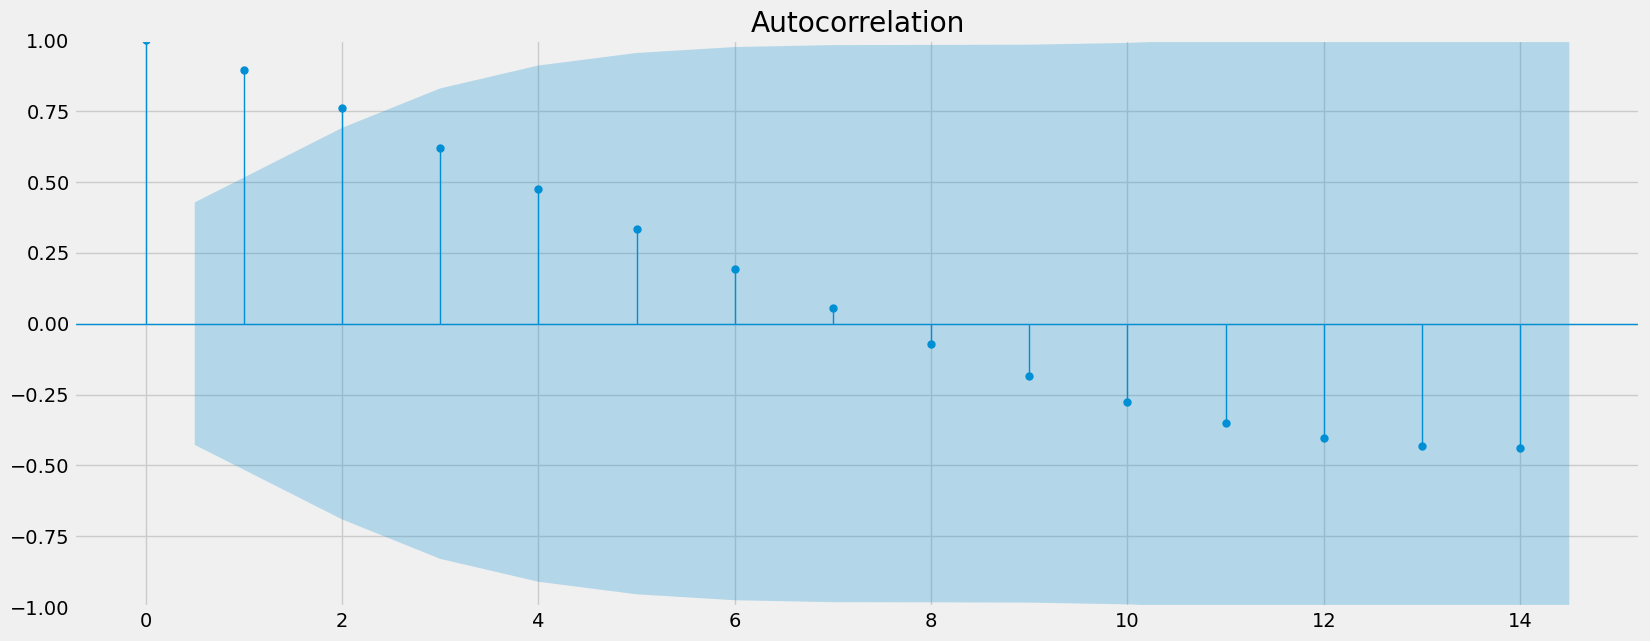

In [141]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # import the autocorrelation and partial correlation plots

plot_acf(df_mean_life)
plt.show()

### 6. Stationarizing the Data

stationary data:  
    Mean drinking water users data is stationary for 5% and 10% significance level. 
    Mean life expectancy data for 10% significance level is stationary

    
Non stationary data: 
    Mean health expenditure data is not stationary. 
    Mean gdp data is not stationary.
    Mean life expectancy data for 1% and 5% is non stationary
    Mean drinking water users data for 1% is not stationary

df_mean_life

In [142]:
data_diff = df_mean_life - df_mean_life.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [143]:
data_diff.dropna(inplace = True) # remove the missing values that came about as a result of the differencing. 
# Without removing, it won't be able to run the Dickey-Fuller test.

In [144]:
data_diff.head()

,life_expect
year,
2001-01-01,0.273330
2002-01-01,0.217404
2003-01-01,0.247107
2004-01-01,0.367243
2005-01-01,0.263751


In [145]:
data_diff.columns

Index(['life_expect'], dtype='object')

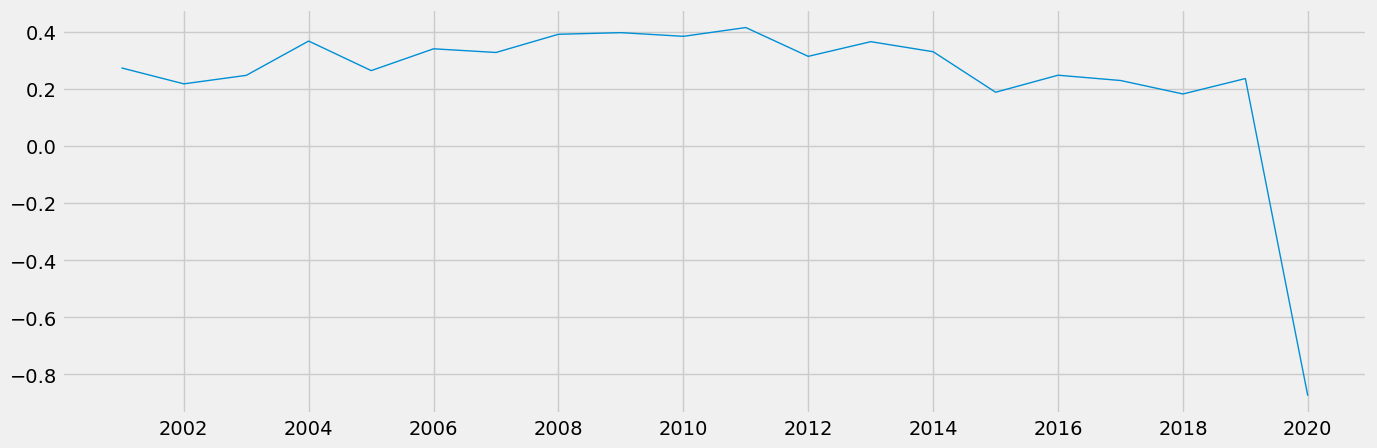

In [146]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [147]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  1.728051
p-value                         0.998195
Number of Lags Used             4.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


The Test statistic is greater than the Critical value at 1%,5% or even 10%, and therefore we cannot reject the null hypothesis. The dataset is not stationary. 

### 7. 1st round Differencing

In [156]:
# create new dataframe with differences
df_diff = data_diff - data_diff.shift(1)

In [157]:
# drop missing value
df_diff.dropna(inplace=True)

In [158]:
df_diff.head()

,life_expect
year,
2002-01-01,-0.055925
2003-01-01,0.029702
2004-01-01,0.120136
2005-01-01,-0.103492
2006-01-01,0.076365


In [159]:
# Apply the test on the time series
dickey_fuller(df_diff['life_expect'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.427061
p-value                         0.982479
Number of Lags Used             5.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


After the first round of differencing the Test statistic is still greater than the critical values 
and p-value > 0.05. Terefore we cannot reject the null hypothesis and the data is not stationary.

### 8. 2nd round differencing

In [160]:
# create dataframe with differences 
df_diff2= df_diff - df_diff.shift(1) 

In [161]:
# drop missing values
df_diff2.dropna(inplace=True)

In [162]:
def dickey_fuller(timeseries): 
    # Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test on the time series 
dickey_fuller(df_diff2['life_expect']) 

Dickey-Fuller Stationarity test:
Test Statistic                 -1.255533
p-value                         0.649263
Number of Lags Used             7.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


The differencing is not enough to fully eliminate non-stationarity and in this case, additional preprocessing steps
or advanced modeling techniques may be necessary when differencing alone may not be sufficient such as: 
    
Detrending technic, advanced machine learning techniques, including neural networks, random forests, or 
gradient boosting machines...) 

Thats why I will try the same procedure with another version of the data set, where I used another approach of cleaning. 
Previously I imputed missing values with average values. For this new version I removed all years with missing 
values, which resulted in a data set with observations for the years between 2000 and 2015.

### 9. Importing new Dataset

In [166]:
df_life = pd.read_pickle(os.path.join(path,'df_life_expectancy_clean.pkl'))
df_life

,Country,Year,Continent,Least Developed,life_expect,Population,CO2_emiss,health_spend,electric_consumption,forest_area,gdp_per_capita,internet_usage,military_spend,open_defecation,drinking_water_services,adult_obesity,beer_consumption
0,Albania,2000,Europe,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,Albania,2001,Europe,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,Albania,2002,Europe,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,Albania,2003,Europe,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,Albania,2004,Europe,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,Zimbabwe,2011,Africa,False,52.896,12894323,0.884886,8.081738,606.643960,46.165723,2101.824051,8.400000,1.407162,26.876148,67.016076,10.8,2.05000
2460,Zimbabwe,2012,Africa,False,55.032,13115149,0.915735,6.918354,636.248991,46.046633,2375.927006,12.000000,1.859609,26.533231,66.491185,11.1,2.07000
2461,Zimbabwe,2013,Africa,False,56.897,13350378,0.919824,7.110148,608.761669,45.927543,2560.773267,15.500000,1.868420,26.188786,65.966474,11.3,2.12000
2462,Zimbabwe,2014,Africa,False,58.410,13586710,0.889104,8.133525,628.746242,45.808453,2612.455954,16.364740,1.888080,25.832157,65.454108,11.6,2.23000


#### 9.1 Create subset and Reset Index

In [168]:
# creating new subset with mean life expectancy per year
df_mean_life= pd.DataFrame(df_life.groupby('Year')['life_expect'].mean())

In [169]:
df_mean_life

,life_expect
Year,
2000,68.436453
2001,68.712396
2002,68.938217
2003,69.194394
2004,69.565919
2005,69.839951
2006,70.186741
2007,70.521125
2008,70.915502


#### 9.2 Plot the data

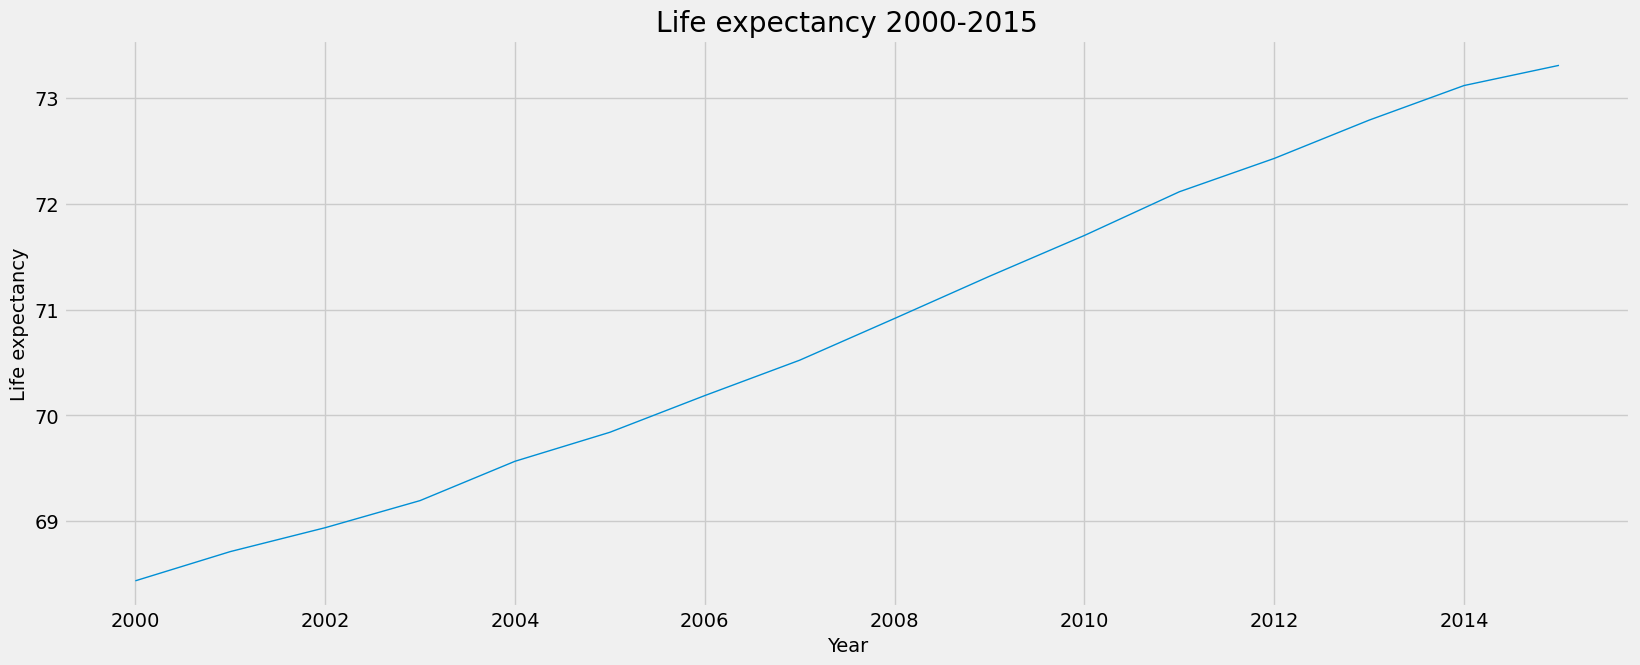

In [170]:
plt.figure(figsize=(18,7), dpi=100) 
plt.title('Life expectancy 2000-2015')
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.plot(df_mean_life)

#### 9.3 Decomposition

In [171]:
# create an index
df_mean_life= df_mean_life.reset_index()

In [177]:
df_mean_life.head()

,life_expect
year,
2000-01-01,68.436453
2001-01-01,68.712396
2002-01-01,68.938217
2003-01-01,69.194394
2004-01-01,69.565919


In [173]:
# turn year column to datetime dtype
df_mean_life['year'] = pd.to_datetime(df_mean_life['Year'], format='%Y') 
# set year column as index
df_mean_life = df_mean_life.set_index('year') 
df_mean_life.drop(['Year'], axis=1, inplace=True) 
df_mean_life.head()

,life_expect
year,
2000-01-01,68.436453
2001-01-01,68.712396
2002-01-01,68.938217
2003-01-01,69.194394
2004-01-01,69.565919


In [174]:
# decomposing line chart into its components
decomposition = sm.tsa.seasonal_decompose(df_mean_life, model='additive')

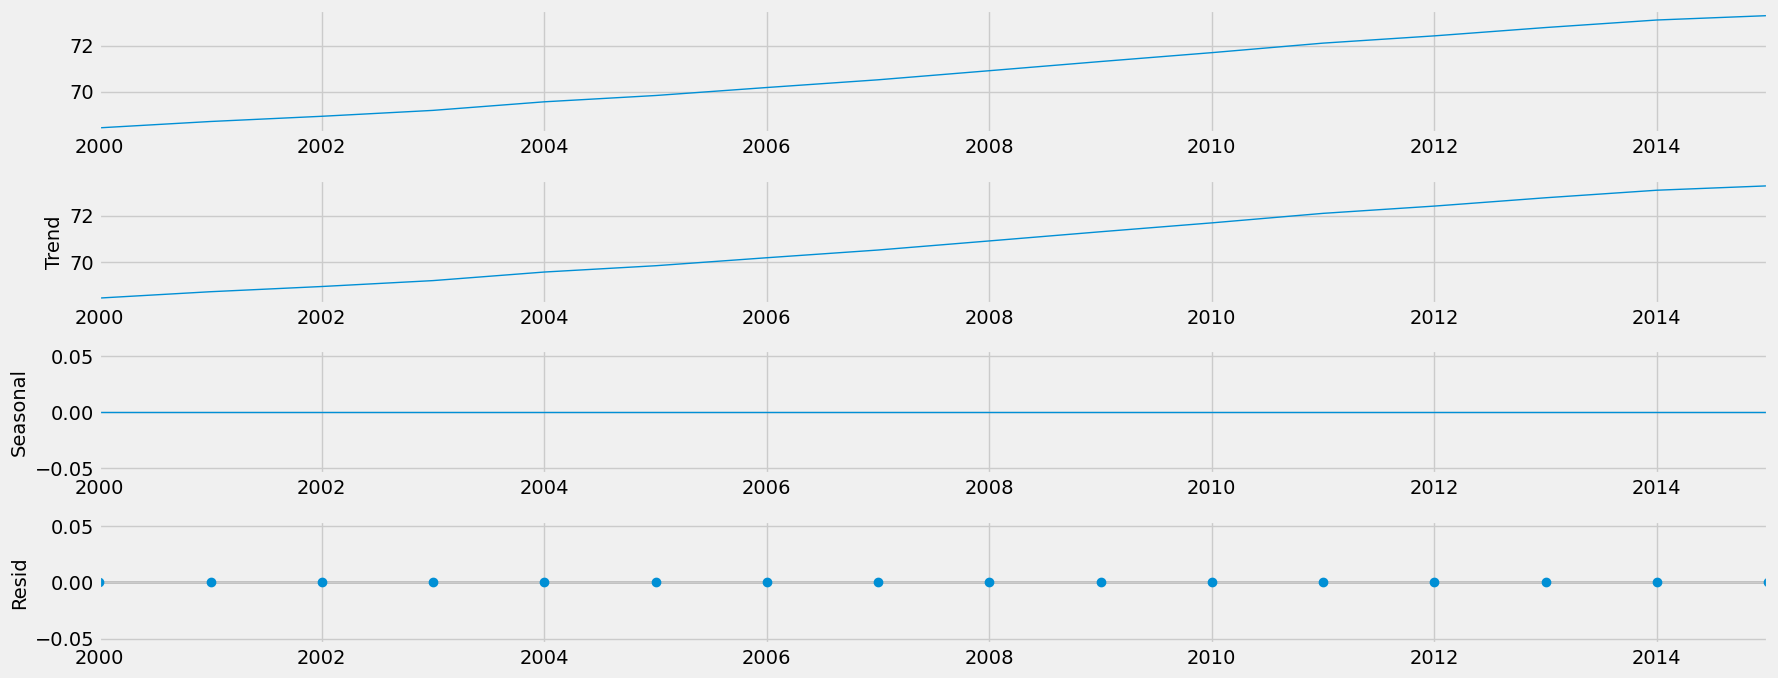

In [175]:
# plotting decomposition chart
decomposition.plot()
plt.show()

There are only yearly periods in this data set, which probably caused the lack of any seasonality component in the 
decomposition.The overall trend of the average life expectancies is positve. Life expectancies are on the steady 
rise. Therefore the chart does not exhibit stationarity but it is very smooth.

#### 9.4 Dicky-Fuller Stationarity Test

In [178]:
# define the function
def dickey_fuller(timeseries): 
    # Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test on the time series with previously defined function
dickey_fuller(df_mean_life['life_expect'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.480540
p-value                         0.120281
Number of Lags Used             5.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


Null hypothesis: The dataset is not statioanary P-value= 0.120281 > 0.05% The Test statistic is greater than the 
Critical value at 1,5 or even 10%, and therefore we cannot reject the null hypothesis. The dataset is not 
stationary. This was to be expected after seeing the upward trend in the decomposition graph.

#### 9.5 1st round Differencing

In [180]:
# create new dataframe with differences
df_diff = df_mean_life - df_mean_life.shift(1)

In [181]:
# drop missing value
df_diff.dropna(inplace=True)

In [182]:
df_diff.head()

,life_expect
year,
2001-01-01,0.275943
2002-01-01,0.225821
2003-01-01,0.256177
2004-01-01,0.371525
2005-01-01,0.274032


In [183]:
# Apply the test on the time series
dickey_fuller(df_diff['life_expect'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.812171
p-value                         0.374436
Number of Lags Used             0.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


After the first round of differencing the Test statistic is still greater than the critical values and 
p-value > 0.05. Terefore we cannot reject the null hypothesis and the data is not stationary.

#### 9.6 2nd round differencing

In [184]:
# create dataframe with differences
df_diff2= df_diff - df_diff.shift(1)

In [185]:
# drop missing values
df_diff2.dropna(inplace=True)

In [186]:
def dickey_fuller(timeseries): 
    # Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test on the time series
dickey_fuller(df_diff2['life_expect'])

Dickey-Fuller Stationarity test:
Test Statistic                 -4.539501
p-value                         0.000167
Number of Lags Used             0.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


The Test statistic is now smaller than the critical values and p-value<0.05 => This means we can reject the null 
hypothesis. The data is now stationary.

#### 9.8 Auto Correlation

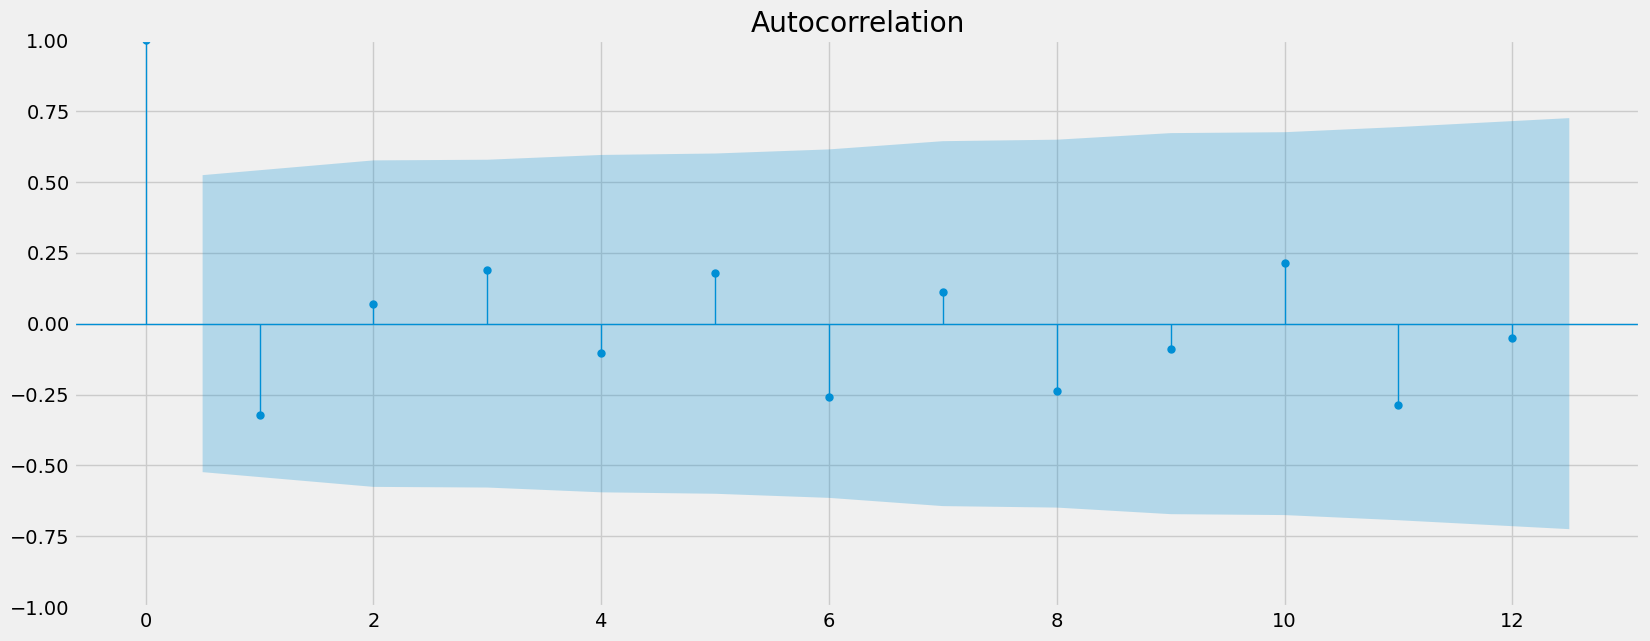

In [187]:
# plot autocorrelation of datapoints in time series
plot_acf(df_diff2)
plt.show()

This test shows autocorrelation within the data poinst. All the staffs except one are within the blue range. 
This means that the data has achieved stationarity.